In [1]:
#d={"q3dten":q3dtenL_,"th3dten":th3dtenL_,"w3d":w3dL_,"q3d":q3dL_,"th3d":th3dL_,"prs":prsL_}
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

with nc.Dataset("mcs_ten.nc") as f:
    q3dten=f.variables["q3dten"][:]
    th3dten=f.variables["th3dten"][:]
    w3d=f.variables["w3d"][:]
    q3d=f.variables["q3d"][:]
    th3d=f.variables["th3d"][:]
    prs=f.variables["prs"][:]
    #timeL=f.variables["time"][:]



In [2]:
print(th3d.shape)
print(th3d[-1,100,5,:])
rho=prs/(287.05*th3d)
print(rho[-1,100,5,:])
print(prs[-1,100,5,:10])
zf=np.array([0.0, 0.125, 0.25, 0.37500003, 0.5, 0.625, 0.75000006, 0.87500006, 1.0, 1.125, 1.25, 1.3750001, 1.5000001, 1.6250001, 1.7500001, 1.8750001, 2.0, 2.125, 2.261364, 2.409091, 2.568182, 2.7386365, 2.9204547, 3.1136367, 3.318182, 3.534091, 3.761364, 4.0, 4.25, 4.5, 4.75, 5.0, 5.2500005, 5.5000005, 5.7500005, 6.0000005, 6.2500005, 6.5000005, 6.7500005, 7.0000005, 7.2500005, 7.5000005, 7.7500005, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.250001, 10.500001, 10.750001, 11.000001, 11.250001, 11.500001, 11.750001, 12.000001, 12.250001, 12.500001, 12.750001, 13.000001, 13.250001, 13.500001, 13.750001, 14.000001, 14.250001, 14.500001, 14.750001, 15.000001, 15.250001, 15.500001, 15.750001, 16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, 17.75, 18.0, 18.25, 18.5, 18.75])
q3dtot_tend=np.sum(q3dten[:,:,:,:,0:6],axis=-1)

(240, 128, 10, 86)
[300.4632  299.86346 299.1612  298.23535 297.6086  296.8849  296.2033
 295.38773 294.471   293.5128  292.55643 291.61554 290.66653 289.72464
 288.794   287.86172 287.00305 286.44315 285.8649  284.9757  283.93958
 282.7333  281.37256 279.86575 278.26257 276.6048  275.11798 274.13892
 273.65024 271.90155 269.75882 267.55112 265.30594 262.99377 260.64966
 258.34738 256.2591  254.73824 253.54758 252.33057 250.9192  249.28288
 247.48515 245.63905 243.85486 242.20573 240.62491 238.90627 236.969
 234.89339 232.95415 231.5254  230.43768 228.01868 225.95866 224.09366
 222.24326 220.82443 219.20163 217.13312 215.43904 214.09743 211.87886
 209.86319 208.38628 207.13269 204.90234 202.60574 200.55925 199.47388
 201.13777 202.31401 201.84795 202.82794 205.09818 206.52354 206.84207
 206.65994 206.28795 205.954   205.9282  206.39098 207.1776  207.86127
 208.26877 208.50383]
[1.0993411540985107 1.070474624633789 1.0421888828277588
 1.0210775136947632 1.0085786581039429 0.996523082256

In [3]:
dz=zf[1:]-zf[:-1]
it=-1
i1=60
j1=5
from numba import jit

dq_dt=q3dtot_tend[:,:,:,:].copy()*0.0
nz=dq_dt.shape[-1]
for k in range(nz-2,-1,-1):
    dq_dt[:,:,:,k]=dq_dt[:,:,:,k+1]+q3dtot_tend[:,:,:,k]*dz[k] # need a rho here


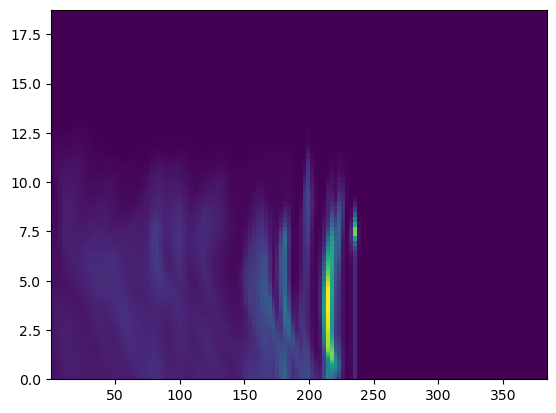

In [6]:

#plt.plot(-dq_dt[it,i1,j1,:],zh)
#plt.plot(q3d[it,i1,j1,:,2],zh)
plt.pcolormesh(xh,zh,-dq_dt[it,:,5,:].T)

(240, 128, 10, 86, 10)


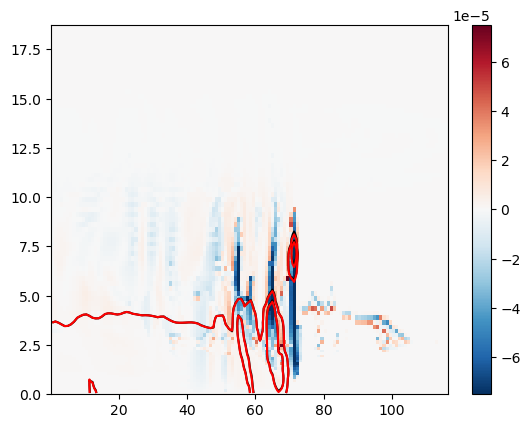

In [5]:

with nc.Dataset('cm1out.nc','r') as f:
    zh=f['zh'][:]
    zf=f['zf'][:]
    xh=f['xh'][:]
    qr=f['qr'][:]
print(q3dten.shape)
c=plt.pcolormesh(xh/3.3,zh,q3dten[239,:,5,:,0].T,cmap="RdBu_r",vmax=0.000075,vmin=-0.000075)
plt.contour(xh/3.3,zh,q3d[239,:,5,:,2].T,levels=[0.0001,0.001],colors="k")
plt.contour(xh/3.3,zh,qr[-1,:,5,:],levels=[0.0001,0.001],colors="red")

plt.colorbar(c)


In [7]:
nt,nx,ny,nz=dq_dt.shape
print(nt*nx*ny)
prs_reshaped=prs.reshape(nt*nx*ny,nz)
th3d_reshaped=th3d.reshape(nt*nx*ny,nz)
q3d_reshaped=q3d[:,:,:,:,1:6].sum(axis=-1).reshape(nt*nx*ny,nz)
w3d_reshaped=w3d.reshape(nt*nx*ny,nz+1)
x=np.stack([prs_reshaped/1e5,(th3d_reshaped-273.15)/10,np.log10(1+q3d_reshaped/1e-4),w3d_reshaped[:,:-1]/10.],axis=-1)

print(x.shape)

307200
(307200, 86, 4)


In [8]:
dq_dt_reshaped=-dq_dt.reshape(nt*nx*ny,nz)
y=np.log10(1+dq_dt_reshaped/1e-4)
#print(dq_dt.max())
#print(dq_dt.min())
#print(q3d_reshaped.min())


In [9]:
# define lstm in pytorch with repeated layers
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as utils
import torch.utils.data as data_utils
import torch.utils.data as utils
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init

import torch
import torch.nn as nn

class MyLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(MyLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        
        # Initialize cell state
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        
        # We need to explicitly provide the initial hidden state and cell state
        out, (hn, cn) = self.lstm(x, (h0, c0))
        
        return out, hn, cn

# Example usage:
input_size = 10  # Number of features in the input
hidden_size = 4  # Number of hidden units in the LSTM layer
num_layers = 1   # Number of LSTM layers

# Create an instance of the model
model = MyLSTMModel(input_size, hidden_size, num_layers)

# Dummy input tensor with shape (batch_size, sequence_length, input_size)
dummy_input = torch.randn((32, 5, input_size))

# Forward pass
output, final_hidden_state, final_cell_state = model(dummy_input)


In [13]:
print(x.shape)
print(output.shape)
model_sed=MyLSTMModel(4,1,2)
out_test=model_sed(torch.from_numpy(x[:,:,:]).float())

(307200, 86, 4)
torch.Size([32, 5, 4])


In [20]:
print(y.shape)
print(out_test[0].shape)

(307200, 86)
torch.Size([307200, 86, 1])


In [27]:
# from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset, DataLoader
# import test_split from sklearn
from sklearn.model_selection import train_test_split

index_train, index_test = train_test_split(np.arange(x.shape[0]), test_size=0.2, random_state=42)
x_train=x[index_train,0:64,:][:,::-1,:].copy()
y_train=y[index_train,0:64][:,::-1,np.newaxis].copy()
x_test=x[index_test,0:64,:][:,::-1,:].copy()
y_test=y[index_test,0:64][:,::-1,np.newaxis].copy()

training_set = TensorDataset(torch.from_numpy(x_train).float(), torch.from_numpy(y_train).float())
data_loader = DataLoader(training_set, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)

In [28]:
#import optimizer
from torch import optim
# define optimizer
optimizer = optim.Adam(model_sed.parameters(), lr=0.001)
# define loss function
loss=nn.MSELoss()
# define number of epochs
n_epochs = 100
# empty list to store training losses
train_losses = []
# training loop
for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    ###################
    # train the model #
    ###################
    for data, target in data_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_sed(data)
        # calculate the loss
        target=target.squeeze()
        loss_output=loss(output[0].squeeze(), target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss_output.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss_output.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(data_loader.dataset)
    train_losses.append(train_loss)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))

Epoch: 1 	Training Loss: 0.004390
Epoch: 2 	Training Loss: 0.001112
Epoch: 3 	Training Loss: 0.000979
Epoch: 4 	Training Loss: 0.000932
Epoch: 5 	Training Loss: 0.000905
Epoch: 6 	Training Loss: 0.000889
Epoch: 7 	Training Loss: 0.000876
Epoch: 8 	Training Loss: 0.000865
Epoch: 9 	Training Loss: 0.000855
Epoch: 10 	Training Loss: 0.000849
Epoch: 11 	Training Loss: 0.000843
Epoch: 12 	Training Loss: 0.000838
Epoch: 13 	Training Loss: 0.000832
Epoch: 14 	Training Loss: 0.000828
Epoch: 15 	Training Loss: 0.000823
Epoch: 16 	Training Loss: 0.000820
Epoch: 17 	Training Loss: 0.000815
Epoch: 18 	Training Loss: 0.000812
Epoch: 19 	Training Loss: 0.000809
Epoch: 20 	Training Loss: 0.000806
Epoch: 21 	Training Loss: 0.000803
Epoch: 22 	Training Loss: 0.000799
Epoch: 23 	Training Loss: 0.000797
Epoch: 24 	Training Loss: 0.000795
Epoch: 25 	Training Loss: 0.000793
Epoch: 26 	Training Loss: 0.000791
Epoch: 27 	Training Loss: 0.000789
Epoch: 28 	Training Loss: 0.000788
Epoch: 29 	Training Loss: 0.0

In [31]:
#save the model
torch.save(model_sed.state_dict(), 'model_sed.pth')
torch.save(model_sed, 'model_sed_all.pth')

In [33]:
# load the saved model
model_sed2=torch.load('model_sed_all.pth')
y_test_=model_sed2(torch.from_numpy(x_test).float())[0].detach().numpy()

[[1.         0.94480205]
 [0.94480205 1.        ]]


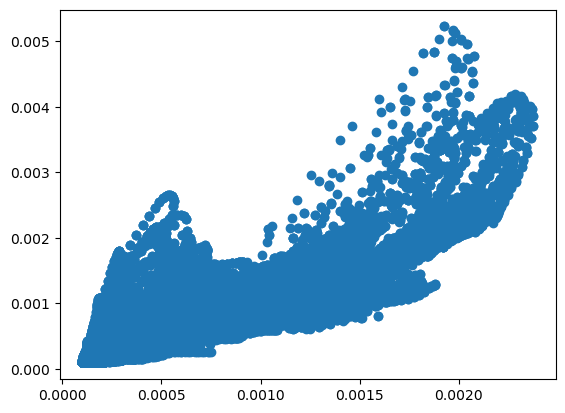

In [41]:
y_=10**(np.exp(y_test_)-1)*1e-4
y_test_r=10**(np.exp(y_test)-1)*1e-4
y_test=y[index_test,0:64][:,::-1,np.newaxis].copy()
plt.scatter(y_,y_test_r)
print(np.corrcoef(y_.flatten(),y_test_r.flatten()))



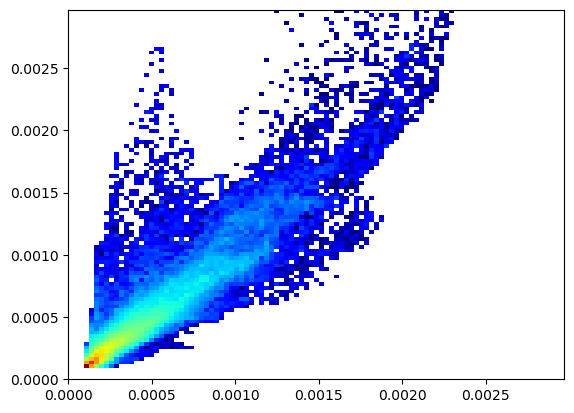

In [44]:
import matplotlib
h1=plt.hist2d(y_.flatten(),y_test_r.flatten(),bins=np.arange(100)*3e-3/100,cmap="jet",norm=matplotlib.colors.LogNorm())

In [55]:
#x=np.stack([prs_reshaped/1e5,(th3d_reshaped-273.15)/10,np.log10(1+q3d_reshaped/1e-4),w3d_reshaped[:,:-1]/10.],axis=-1)
q_test=(10**x_test[:,:,2][:,::-1]-1)*1e-4
x_test_iterated=x_test.copy()
#print(x_test.shape)
#plt.plot(q_test[:,:].mean(axis=0),zh[:64])

q0=(10**x_test[:,:,2][:,::-1]-1)*1e-4
q1=q0.copy()
qL=[]

In [62]:

for it in range(30):
    flux=((10**y_test_-1)*1e-4)[:,::-1]
    for i in range(62,-1,-1):
        q1[:,i]=q0[:,i+1]+(-flux[:,i,0]+flux[:,i+1,0])/dz[i]
    q1[:,63]=q0[:,63]-flux[:,63,0]/dz[63]
    q1[q1<0]=0
    x_test_iterated[:,:,2]=np.log10(1+q1/1e-4)[::-1]
    y_test_=model_sed2(torch.from_numpy(x_test_iterated).float())[0].detach().numpy()
    q0=q1.copy()
    qL.append(q0.mean(axis=0))

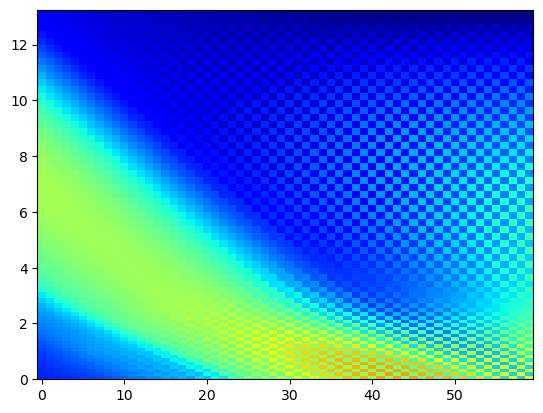

In [63]:
plt.pcolormesh(range(len(qL)),zh[:64],np.array(qL).T,cmap="jet",vmax=0.0006*3)

In [53]:
print(flux.shape)
print(q1.shape)

(61440, 64, 1)
(61440, 64)
